In [2]:
import numpy as np
import math
import random
import heapq
import matplotlib.pyplot as plt

In [3]:

qty = 5  # or however many points you want(群體規模)

deltas = set()
randPoints = []
excluded = set()
i = 0
while i<qty:
    x = random.uniform(2,4)
    x = round(x,5)
    y = random.uniform(-1,2)
    y = round(y,5)
    if x+y<3: continue
    randPoints.append([x,y])
    i += 1
    excluded.update((x+dx, y+dy) for (dx,dy) in deltas)
    
print (randPoints)

[[2.99909, 1.29776], [3.19064, 1.51626], [2.74423, 0.76923], [3.39132, 0.53178], [3.83196, -0.41265]]


In [4]:
Dim=2         #dimension
pop_size=20   #population_size
w_it_max=0.7 #inertia weight max 
w_it_min=0.3  #inertia weight min 
c1=2.05         #acceleration factor
c2=2.05         #acceleration factor
max_iter=300  #iterations
gbest =float('inf') 
def fitness(randPoints):#將x,y的list放進去可以得到全部元素的fitness
    a = []
    for i in randPoints:       
        gg=(i[1]- 1)**4-(math.sin(5*math.pi*(i[0]**(3/4)-0.1))**2) 
        a.append(gg)
    return a

def pbest(fit):#將fitness 的list 放入可以得到區域最佳解
    a = fitness(randPoints)
    b = np.argmin(a)
    c = randPoints[b]
    return [min(a),c]


#def vel(randPoints):#生出該點xy的速度
    #all_vel = []
    #for i in randPoints:
        #vel1=w*i[0]+c1*np.random.random()*(small-i[0])+c2*np.random.random()*(gbest-i[0])
        #vel2=w*i[1]+c1*np.random.random()*(small-i[1])+c2*np.random.random()*(gbest-i[1])
        #vel = [vel1,vel2]
        #all_vel.append(vel)
    #return(all_vel)
def vel(i,w,gbest):#生出該點xy的速度
    vel1=w*i[0]+c1*np.random.random()*(pbest(fit)[0]-i[0])+c2*np.random.random()*(gbest-i[0])
    vel2=w*i[1]+c1*np.random.random()*(pbest(fit)[0]-i[1])+c2*np.random.random()*(gbest-i[1])
    vel = [vel1,vel2]
    
    
    return(vel)
def new_location(randPoints):#舊位子加上向量變成新位子
    new = []
    for i in randPoints:
        
        a =  i[0]+vel(i,w,gbest)[0]
        b =  i[1]+vel(i,w,gbest)[1]
        c = [a,b]
        new.append(c)
    return new


In [5]:
btl = []
gtl = []
max_iter= 1000
Dim=2         #dimension
pop_size=20   #population_size
w_it_max=1  #inertia weight max 
w_it_min=0.3  #inertia weight min 
c1=2.05          #acceleration factor
        
c2=2.05          #acceleration factor

gbest =10000
t = 0 #iteration time


while t< max_iter:
    
    w=w_it_max-(t/max_iter)*(w_it_max-w_it_min)
    
    #將list的數字限制再五位數內
    for i in range(5):
        for j in range(2):
            f = randPoints[i][j] 
            f = round(f,7)
            randPoints[i][j] = f
          
    
    ##檢測list是否有在範圍內，如果超出即回彈
    for i in range(5):       
        while 2>=randPoints[i][0]or randPoints[i][0] >=4:
            
            if randPoints[i][0] <2:
                randPoints[i][0]  = 2+(2-randPoints[i][0])
                
            else:
                randPoints[i][0]  = 4-(randPoints[i][0]-4)
                
        if randPoints[i][0]+randPoints[i][1]<3:
            randPoints[i][1] = 3-randPoints[i][0]       
    #將list的數字限制再五位數內
    for i in range(5):
        for j in range(2):
            f = randPoints[i][j] 
            f = round(f,7)
            randPoints[i][j] = f
    
    fit = fitness(randPoints)#將x,y的list放進去可以得到全部元素的fitness
    nowgood = pbest(fit)[0]
    btl.append(nowgood)
    
    #this_time_good = pbest(fit)[0]#將fitness 的list 放入可以得到區域最佳解,[0]是fitness,[1]是座標
    allgood = min(gbest,pbest(fit)[0])
    gtl.append(allgood)
    
    if pbest(fit)[0]<gbest:
        gbest = min(gbest,pbest(fit)[0])
        allgbest = pbest(fit)[1]
        for i in randPoints:
            vel1=w*i[0]+c1*np.random.random()*(pbest(fit)[0]-i[0])+c2*np.random.random()*(gbest-i[0])
            vel2=w*i[1]+c1*np.random.random()*(pbest(fit)[0]-i[1])+c2*np.random.random()*(gbest-i[1])
            bestvel = [vel1,vel2]
        
    g = new_location(randPoints)
    randPoints =g 
    
    t +=1
print(gbest)
print(allgbest)

-0.9998273608942537
[3.2147556, 0.9562611]


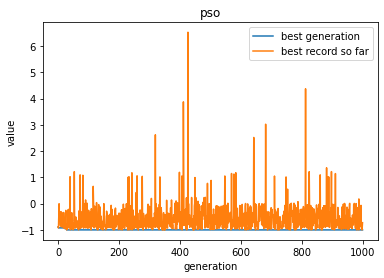

In [7]:
plt.figure()
plt.title("pso")
plt.plot([i for i in range(1000)],gtl,label = "best generation")
plt.plot([i for i in range(1000)],btl,label = "best record so far")
plt.xlabel("generation")
plt.ylabel("value")
plt.legend(loc = "best")
plt.show()